# 과제2-답안

## Chapter 3 자료의 정리 심화문제

### 27. 통계청 년도별 출생아 수 자료 정리하기

### Q. 2004년~2012년(9년) 동안의 출생아 수와 여자아이 100명당 남자아이의 비율 표로 나타내기

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#한글 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정
plt.rcParams['font.family'] = "AppleGothic"  # 맥 사용자

datas = {2004:[472761,108.2], 2005:[435031,107.8], 2006:[448153,107.5], 
         2007:[493183,106.2], 2008:[465891,106.4], 2009:[444849,106.4],
         2010:[470171,106.9], 2011:[471265,105.7], 2012:[484550,105.7]}

df = pd.DataFrame(datas, index=['출생아수', '출생성비'])

print(df.iloc[0].apply(pd.to_numeric))

df

2004    472761.0
2005    435031.0
2006    448153.0
2007    493183.0
2008    465891.0
2009    444849.0
2010    470171.0
2011    471265.0
2012    484550.0
Name: 출생아수, dtype: float64


,2004,2005,2006,2007,2008,2009,2010,2011,2012
출생아수,472761.0,435031.0,448153.0,493183.0,465891.0,444849.0,470171.0,471265.0,484550.0
출생성비,108.2,107.8,107.5,106.2,106.4,106.4,106.9,105.7,105.7


### (a) 년도별 출생아 수 막대그래프 

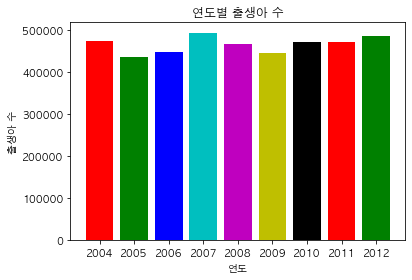

In [9]:
x = df.columns   # 출생년도
y = df.loc['출생아수',:].values  # 출생아수 행 전체 = df.iloc[0]

colors = ['r','g','b','c','m','y','k']

plt.bar(x, y, color=colors)
plt.title('연도별 출생아 수')
plt.xlabel('연도')
plt.ylabel('출생아 수')
plt.xticks(x)  #x축 레이블 출력
#plt.ylim(400000, 500000)  # y축 범위 지정
plt.show()

### (b) 여아, 남아 출생아수 구분하여 꺾은선 그래프 나타내기

In [7]:
#출생아수(total), 출생성비(rate), 여아(f), 남아(m)
# f + m = total, f : m = 100 : rate 
# f = 100 * total / (100 + rate) 
# m = total - f


total = df.loc['출생아수',:].values  # 출생아수 행 전체 = df.iloc[0]
rate  = df.loc['출생성비',:].values  # 출생성비 행 전체 = df.iloc[1]
f = [round(100*total[idx]/(100+rate[idx])) for idx, i in enumerate(total)]
m = [i - f[idx] for idx, i in enumerate(total)]

df.loc['여아'] = f
df.loc['남아'] = m
df


# df.loc['여아',:] = df.loc['여아',:].astype(int)
# df.loc['남아',:] = df.loc['남아',:].astype(int)

df

,2004,2005,2006,2007,2008,2009,2010,2011,2012
출생아수,472761.0,435031.0,448153.0,493183.0,465891.0,444849.0,470171.0,471265.0,484550.0
출생성비,108.2,107.8,107.5,106.2,106.4,106.4,106.9,105.7,105.7
여아,227071.0,209351.0,215977.0,239177.0,225722.0,215528.0,227246.0,229103.0,235561.0
남아,245690.0,225680.0,232176.0,254006.0,240169.0,229321.0,242925.0,242162.0,248989.0


#### 여아, 남아 출생아수 꺽은선 그래프

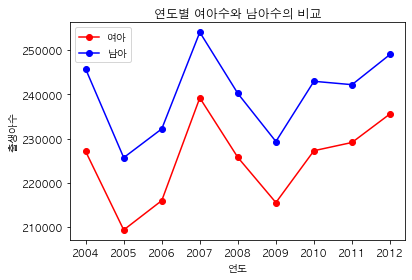

In [10]:
plt.plot(x, f, 'o', linestyle='-', color='r', label='여아')
plt.plot(x, m, 'o', linestyle='-', color='b', label='남아')
plt.title('연도별 여아수와 남아수의 비교')
plt.xlabel('연도')
plt.ylabel('출생아수')
plt.xticks(x)  #x축 레이블 출력     
plt.legend()
plt.show()

---

## 28. 500개 측정값 조사 결과 자료 정리하기

### (a). 도수분포표 완성

In [2]:
import math
import pandas as pd
#도수
data = [25,55,60,90,115,85,50,20]

# 계급 수
k = 8
# 계급 간격
w = 4 
# 시작 계급값
s = 0.5

# 전체 계급
bins = [ s + i*w for i in range(k+1)]  #계급

#계급구간
index = [ f'{bins[i]} ~ {bins[i]+w}' for i in range(k) ]

# 도수분포표 만들기
df = pd.DataFrame(data, index=index, columns=['도수'])
df.index.name = '계급간격'

df['상대도수'] = [x/sum(data) for x in data]

df['누적도수'] = [sum(data[:i+1]) if i>0 else data[i] for i in range(k)]

tmp = df['상대도수'].values
df['누적상대도수'] = [sum(tmp[:i+1]) if i>0 else tmp[i] for i in range(k)]

df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

df.loc['합계'] = [ sum(data), sum(tmp),'','','' ]

df

,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
0.5 ~ 4.5,25,0.05,25,0.05,2.5
4.5 ~ 8.5,55,0.11,80,0.16,6.5
8.5 ~ 12.5,60,0.12,140,0.28,10.5
12.5 ~ 16.5,90,0.18,230,0.46,14.5
16.5 ~ 20.5,115,0.23,345,0.69,18.5
20.5 ~ 24.5,85,0.17,430,0.86,22.5
24.5 ~ 28.5,50,0.10,480,0.96,26.5
28.5 ~ 32.5,20,0.04,500,1.0,30.5
합계,500,1.00,,,


### (b). 도수히스토그램과 누적상대도수히스토그램 그리기

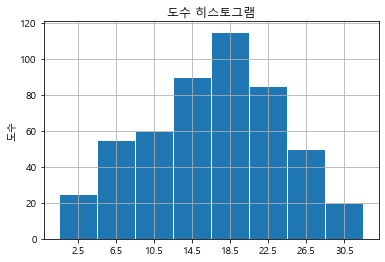

In [51]:
# 도수히스토그램
x = df['계급값'].values[:k]
y = df['도수'].values[:k]

plt.bar(x, y, width=4, edgecolor='w')
plt.title('도수 히스토그램')
plt.ylabel('도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

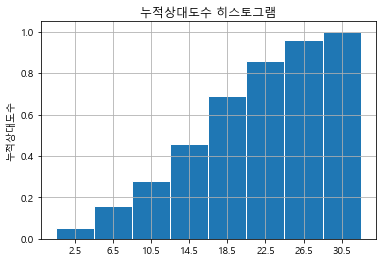

In [52]:
# 누적상대도수히스토그램
x = df['계급값'].values[:k]
y = df['누적상대도수'].values[:k]

plt.bar(x, y, width=4, edgecolor='w')
plt.title('누적상대도수 히스토그램')
plt.ylabel('누적상대도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

### (c) 누적상대도수다각형 그리기

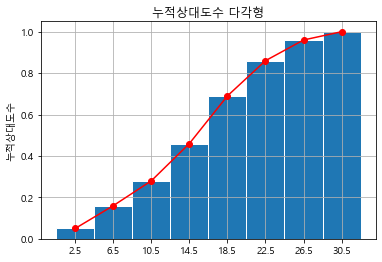

In [53]:
# 도수히스토그램
x = df['계급값'].values[:k]
y = df['누적상대도수'].values[:k]

plt.bar(x, y, width=4, edgecolor='w')
plt.plot(x,y, 'o', linestyle='-', color='r')
plt.title('누적상대도수 다각형')
plt.ylabel('누적상대도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

---

## 29. 통계청 연도별 우리나라 남자와 여자의 기대수명 예측

### Q. 우리나라 남자와 여자의 기대수명 그래프와 기대수명 예측하기

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 딕셔너리로 DataFrame으로 나타내기
datas ={2003:[77.4,73.9,80.8], 2004:[78.0,74.5,81.4],
        2005:[78.6,75.1,81.9], 2006:[79.2,75.7,82.4],
        2007:[79.6,76.1,82.7], 2008:[80.1,76.5,83.3],
        2009:[80.6,11.0,83.8], 2010:[80.8,77.2,84.1],
        2011:[81.2,77.7,84.5], 2012:[81.4,78.0,84.6]}

df = pd.DataFrame(datas, index=['기대수명','남자','여자'])

df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
기대수명,77.4,78.0,78.6,79.2,79.6,80.1,80.6,80.8,81.2,81.4
남자,73.9,74.5,75.1,75.7,76.1,76.5,11.0,77.2,77.7,78.0
여자,80.8,81.4,81.9,82.4,82.7,83.3,83.8,84.1,84.5,84.6


In [69]:
# 파일 읽어와서 DataFrame으로 나타내기
df = pd.read_csv('data/data_29.csv', engine='python')

df.index = ['기대수명','남자','여자']
df.columns.name = '연도'

df

연도,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
기대수명,77.4,78.0,78.6,79.2,79.6,80.1,80.6,80.8,81.2,81.4
남자,73.9,74.5,75.1,75.7,76.1,76.5,77.0,77.2,77.7,78.0
여자,80.8,81.4,81.9,82.4,82.7,83.3,83.8,84.1,84.5,84.6


### (a). 남자와 여자의 기대수명 꺽은선 그래프

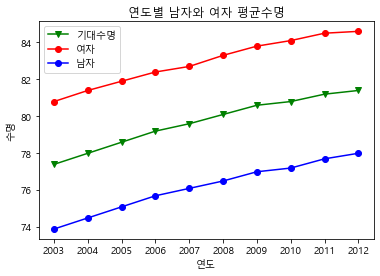

#수명 분석결과: 
여자의 기대수명이 남자의 기대수명보다 높다
수명이 거의 직선으로 증가한다


In [102]:
x = df.columns
t = df.iloc[0]  # df.loc['기대수명', :].values
m = df.iloc[1]  # df.loc['남자', :].values 
f = df.iloc[2]  # df.loc['여자', :].values 

plt.plot(x, t, 'v', linestyle='-', color='g', label=t)
plt.plot(x, f, 'o', linestyle='-', color='r')
plt.plot(x, m, 'o', linestyle='-', color='b')

plt.title('연도별 남자와 여자 평균수명')
plt.xlabel('연도')
plt.ylabel('수명')
plt.xticks(x)  #x축 레이블 출력     
plt.legend(['기대수명','여자','남자'])
plt.show()

print('''#수명 분석결과: 
여자의 기대수명이 남자의 기대수명보다 높다
수명이 거의 직선으로 증가한다''')

### (b). 2020년도 남자와 여자 기대수명 예측

2003년 기대수명: 77.4, 2012년 기대수명: 81.4 


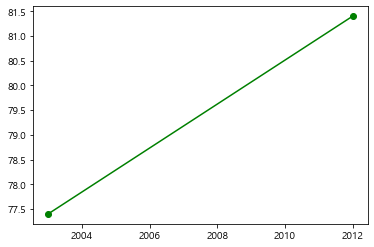

In [87]:
print(f"2003년 기대수명: {df['2003'][0]}, 2012년 기대수명: {df['2012'][0]} ")

x = [2003, 2012]
y = [df['2003'][0],df['2012'][0]]

# 직선 그리기 
plt.plot(x, y, 'o', linestyle='-', color='g', label='기대수명')
plt.show()

In [113]:
x = [2003, 2012]
y = [df['2003'][1],df['2012'][1] ] # 남자
#y = [df['2003'][2],df['2012'][2] ] # 여자
print(f'년도: {x}, 기대수명: {y}')

# y = ax +  b (기울기:)
# 방법1: 
a = (y[1]-y[0])/(x[1]-x[0])  #기울기: y증가분/x증가분
b = y[0] - a * x[0] 
print(f'y = {a}x + {b}')


# 방법2: scipy.stats를 이용한 기울기
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f'y = {slope}x + {intercept}')
    
    
# 방법3: numpy.polyfit
import numpy as np
slope, intercept = np.polyfit(x, y, 1)  # 기울기, 절편
print(f'y = {slope}x + {intercept}')


x = 2022
print(f'2020년 예측수명: {slope*x + intercept}')


년도: [2003, 2012], 기대수명: [73.9, 78.0]
y = 0.45555555555555494x + -838.5777777777765
y = 0.45555555555555494x + -838.5777777777765
y = 0.45555555555554833x + -838.5777777777633
2020년 예측수명: 82.55555555555543


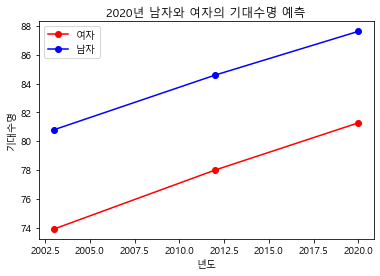

기대수명 예측: 
 2003년부터 2012년까지 8년간 평균기대수명은 4년 늘어났으므로 
 향후 2013년부터 2020년까지도 대략 4년의 기대수명이 연장될 것으로 전망됨


In [101]:

x = [2003,2012,2020]
y1= [73.9,78.0,81.28]
y2= [80.8,84.6,87.64]


plt.plot(x, y1, 'o', linestyle='-', color='r', label='여자')
plt.plot(x, y2, 'o', linestyle='-', color='b', label='남자')
plt.legend()
plt.xlabel('년도')
plt.ylabel('기대수명')
plt.title('2020년 남자와 여자의 기대수명 예측')
plt.show()

print('''#기대수명 예측: 
 2003년부터 2012년까지 8년간 평균기대수명은 4년 늘어났으므로 
 향후 2013년부터 2020년까지도 대략 4년의 기대수명이 연장될 것으로 전망됨''')

-------

## Chapter 4 자료의 수치적 특성

### 29. 하천의 수질농도 분석하기

In [2]:
import pandas as pd
import numpy as np

# 딕셔너리로 DataFrame으로 나타내기
datas ={ 0:[38,22], 4:[36,20], 8:[42,23],
        12:[39,22],16:[37,22],20:[45,25] }

df = pd.DataFrame(datas, index=['BOD','COD'])
df.columns.name = '시각'
df

시각,0,4,8,12,16,20
BOD,38,36,42,39,37,45
COD,22,20,23,22,22,25


In [138]:
# (a). BOD, COD 평균
print(f'BOD 평균: { np.mean(df.iloc[0]) }')
print(f'COD 평균: { np.mean(df.iloc[1]) }\n')

# (b). BOD, COD 표준편차
print(f'BOD 표준편차: { np.std(df.iloc[0]) }')
print(f'COD 표준편차: { np.std(df.iloc[1]) }\n')

# (c). BOD, COD 변동계수
print(f'BOD 변동계수: { np.std(df.iloc[0])/np.mean(df.iloc[0])*100 }')
print(f'COD 변동계수: { np.std(df.iloc[1])/np.mean(df.iloc[1])*100 }\n')

BOD 평균: 4451.8
COD 평균: 5223.4

BOD 표준편차: 359.5148953798716
COD 표준편차: 290.14727294944544

BOD 변동계수: 8.075719829728909
COD 변동계수: 5.554758834273566



### 30. 어느 광역시의 인구 증가요인 분석 결과

In [126]:
import pandas as pd
import numpy as np

# 딕셔너리로 DataFrame으로 나타내기
datas ={ 2012:[3971,5102], 2013:[4236,5046], 2014:[4933,5361],
         2015:[4798,5718], 2016:[4321,4890] }

df = pd.DataFrame(datas, index=['전입','전출'])
df.columns.name = '연도'
df

연도,2012,2013,2014,2015,2016
전입,3971,4236,4933,4798,4321
전출,5102,5046,5361,5718,4890


전입 평균: 465094.8888888889
전출 평균: 106.75555555555556



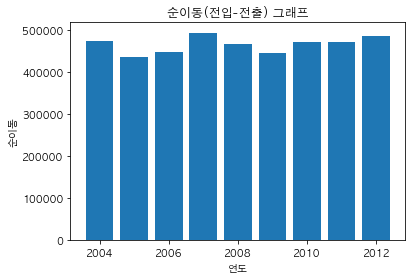

순이동 평균: 464988.1333333333
순이동 평균이 음수인 것으로 보아 외지로 전출한 인원이 더 많음

전입 표준편차: 17924.051479286114
전출 표준편차: 0.8525922708111489

전입 변동계수: 3.8538483022478816
전출 변동계수: 0.798639720784798


In [11]:
# (a). 전입, 전출 평균
print(f'전입 평균: { np.mean(df.iloc[0]) }')
print(f'전출 평균: { np.mean(df.iloc[1]) }\n')


# (b). 순이동: 전입 - 전출 의 평균
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.bar(df.columns, df.iloc[0]-df.iloc[1] )
plt.xlabel('연도')
plt.ylabel('순이동')
plt.title('순이동(전입-전출) 그래프')
plt.show()

print(f'순이동 평균: { np.mean(df.iloc[0]-df.iloc[1]) }')
print('순이동 평균이 음수인 것으로 보아 외지로 전출한 인원이 더 많음\n')


# (c). 전입, 전출 표준편차
print(f'전입 표준편차: { np.std(df.iloc[0]) }')
print(f'전출 표준편차: { np.std(df.iloc[1]) }\n')


# (d). 전입, 전출 변동계수
print(f'전입 변동계수: { np.std(df.iloc[0])/np.mean(df.iloc[0])*100 }')
print(f'전출 변동계수: { np.std(df.iloc[1])/np.mean(df.iloc[1])*100 }')